In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn.cluster import KMeans

In [2]:
products = pd.read_csv("products_old.csv")

In [12]:
trainall = pd.read_csv("train.csv")

In [18]:
train = trainall.drop(['user','category'],axis=1)
train.shape

(42365, 4)

In [40]:
data = train.merge(products, left_on='sku', right_on='sku',how='inner')

In [87]:
data['name'] = data.name.str.lower()
data['name'] = data.name.str.replace(r"[^\w\s']",' ')
data['name'] = data.name.str.strip()
data['query'] = data['query'].str.lower()
data['query'] = data['query'].str.replace(r"[^\w\s']",' ')
data['query'] = data['query'].str.strip()

In [96]:
data['click_time'] =  pd.to_datetime(data['click_time'] )
data['query_time'] =  pd.to_datetime(data['query_time'] )
data['time_diff'] = data.click_time - data.query_time
data['time_diff'] = data['time_diff'].dt.total_seconds().astype(int)
data.customerReviewCount = data.customerReviewCount.fillna(0).astype(int)

In [ ]:
data = data.drop(['salePrice'],axis=1)

In [88]:
def get_jaccard_sim(x): 
    a = set(x[0].split()) 
    b = set(x[1].split())
    c = a.intersection(b)
    return round(float(len(c)) / (len(a) + len(b) - len(c)),2)

In [78]:
data['name_query_sim'] = data[['name','query']].apply(get_jaccard_sim,axis=1)

In [100]:
data

,sku,query,click_time,query_time,index,productId,name,new,regularPrice,customerReviewCount,...,onlineAvailability_soldOut,onlineAvailability_businessDay1,onlineAvailability_businessDay12,esrb_everyone10,esrb_everyone,esrb_mature,esrb_pending,esrb_teen,time_diff,name_query_sim
0,2032076,gears of war,2011-10-09 17:22:56.101,2011-10-09 17:21:42.917,177,1218306461292,gears of war triple pack,0,29.99,15,...,0,1,0,0,0,1,0,0,73,0.60
1,2032076,xbox 360,2011-09-23 16:22:41.255,2011-09-23 16:19:20.925,177,1218306461292,gears of war triple pack,0,29.99,15,...,0,1,0,0,0,1,0,0,200,0.00
2,2032076,gears of war,2011-09-24 13:05:36.624,2011-09-24 13:05:02.961,177,1218306461292,gears of war triple pack,0,29.99,15,...,0,1,0,0,0,1,0,0,33,0.60
3,2032076,gears of war triple pack,2011-09-04 20:09:04.395,2011-09-04 20:08:47.268,177,1218306461292,gears of war triple pack,0,29.99,15,...,0,1,0,0,0,1,0,0,17,1.00
4,2032076,gears of war,2011-09-30 08:59:47.095,2011-09-30 08:58:28.462,177,1218306461292,gears of war triple pack,0,29.99,15,...,0,1,0,0,0,1,0,0,78,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42060,3838112,king of figthers,2011-10-26 16:41:54.847,2011-10-26 16:41:28.657,543,1218435168022,the king of fighters xiii,0,39.99,0,...,0,0,0,0,0,0,0,1,26,0.33
42061,3838112,king of fighters xbox,2011-10-28 10:12:57.654,2011-10-28 10:12:05.422,543,1218435168022,the king of fighters xiii,0,39.99,0,...,0,0,0,0,0,0,0,1,52,0.50
42062,8947768,infinite undiscovery,2011-09-18 12:43:20.129,2011-09-18 12:43:16.139,641,1215819590776,infinite undiscovery,0,19.99,6,...,0,0,0,0,0,0,0,1,3,1.00
42063,9977237,xbox 360 white,2011-10-15 17:52:58.697,2011-10-15 17:52:53.692,857,1218204528947,shaun white skateboarding,0,9.50,1,...,0,1,0,0,0,0,0,1,5,0.20


In [98]:
data.columns

Index(['sku', 'query', 'click_time', 'query_time', 'index', 'productId',
       'name', 'new', 'regularPrice', 'customerReviewCount',
       'customerReviewAverage', 'freeShipping', 'onlineAvailability',
       'onlineAvailabilityText', 'releaseDate', 'shippingCost',
       'shortDescription', 'manufacturer', 'inStorePickup', 'esrbRating',
       'longDescription', 'onlineAvailability_notAvailable',
       'onlineAvailability_preOrder', 'onlineAvailability_soldOut',
       'onlineAvailability_businessDay1', 'onlineAvailability_businessDay12',
       'esrb_everyone10', 'esrb_everyone', 'esrb_mature', 'esrb_pending',
       'esrb_teen', 'time_diff', 'name_query_sim'],
      dtype='object')

In [119]:
data[['sku','name','new','regularPrice','customerReviewCount','customerReviewAverage','freeShipping',
      'onlineAvailability','releaseDate','shippingCost','manufacturer','inStorePickup','onlineAvailability_notAvailable',
      'onlineAvailability_preOrder','onlineAvailability_soldOut','onlineAvailability_businessDay1',
      'onlineAvailability_businessDay12','esrb_everyone10','esrb_everyone','esrb_mature','esrb_pending','esrb_teen',
      'time_diff','name_query_sim']]

,sku,name,new,regularPrice,customerReviewCount,customerReviewAverage,freeShipping,onlineAvailability,releaseDate,shippingCost,...,onlineAvailability_soldOut,onlineAvailability_businessDay1,onlineAvailability_businessDay12,esrb_everyone10,esrb_everyone,esrb_mature,esrb_pending,esrb_teen,time_diff,name_query_sim
0,2032076,gears of war triple pack,0,29.99,15,4.8,1,1,2011-02-15,0.0,...,0,1,0,0,0,1,0,0,73,0.60
1,2032076,gears of war triple pack,0,29.99,15,4.8,1,1,2011-02-15,0.0,...,0,1,0,0,0,1,0,0,200,0.00
2,2032076,gears of war triple pack,0,29.99,15,4.8,1,1,2011-02-15,0.0,...,0,1,0,0,0,1,0,0,33,0.60
3,2032076,gears of war triple pack,0,29.99,15,4.8,1,1,2011-02-15,0.0,...,0,1,0,0,0,1,0,0,17,1.00
4,2032076,gears of war triple pack,0,29.99,15,4.8,1,1,2011-02-15,0.0,...,0,1,0,0,0,1,0,0,78,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42060,3838112,the king of fighters xiii,0,39.99,0,NaN,1,0,2011-11-22,0.0,...,0,0,0,0,0,0,0,1,26,0.33
42061,3838112,the king of fighters xiii,0,39.99,0,NaN,1,0,2011-11-22,0.0,...,0,0,0,0,0,0,0,1,52,0.50
42062,8947768,infinite undiscovery,0,19.99,6,4.2,1,0,2008-09-02,NaN,...,0,0,0,0,0,0,0,1,3,1.00
42063,9977237,shaun white skateboarding,0,9.50,1,3.0,1,1,2010-10-24,0.0,...,0,1,0,0,0,0,0,1,5,0.20


In [ ]:
data = data.dropna(subset=['shortDescription','longDescription'])

In [131]:
data['description'] = data['shortDescription'].astype(str) + ' ' + data['longDescription'].astype(str)
data[['shortDescription','longDescription','description']].sample(15)

C:\Users\ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,shortDescription,longDescription,description
27379,dark knight return epic follow exclus extra,night fall gotham seedi undergrowth citi emerg...,dark knight return epic follow exclus extra ni...
9115,figur truli greatest ever play nba,last year 5 000 000 copi sold worldwid 20 spor...,figur truli greatest ever play nba last year 5...
28332,embark thrill adventur search world greatest t...,mist cold mountain cloud effect visibl got bea...,embark thrill adventur search world greatest t...
36843,match legend superstar find greatest competito...,view atop ring corner post glorious one stand ...,match legend superstar find greatest competito...
33177,seek piec american dream member mob,golden age 1950s american dream seem closer ot...,seek piec american dream member mob golden age...
7193,find happen zombi outbreak hit tropic island p...,beach bunni parad around sand skimpi bikini wa...,find happen zombi outbreak hit tropic island p...
27443,dark knight return epic follow exclus extra,night fall gotham seedi undergrowth citi emerg...,dark knight return epic follow exclus extra ni...
30684,readi go back track,learn forza motorsport 4 flash demo synopsisyo...,readi go back track learn forza motorsport 4 f...
33443,step ring get readi experi wwe like never,love superstar diva legend watch everi move ca...,step ring get readi experi wwe like never love...
8048,find happen zombi outbreak hit tropic island p...,beach bunni parad around sand skimpi bikini wa...,find happen zombi outbreak hit tropic island p...


In [127]:
desc = CountVectorizer(ngram_range=(1,2)).fit_transform(data.description)

In [128]:
desc.shape

(42064, 46383)

In [193]:
len(products.manufacturer.unique())

56

description (short+long), manufactturer - dummies, esrb rating

In [3]:
products['description'] = products['shortDescription'].astype(str) + ' ' + products['longDescription'].astype(str)
products['description'] = products['description'].apply(lambda x: re.sub(r'\w*\d\w*', '',x))

In [4]:
manufacturerDum = pd.get_dummies(products.manufacturer,drop_first=True)

In [5]:
products1 = products[['esrb_everyone10', 'esrb_everyone', 'esrb_mature', 'esrb_pending','esrb_teen']]
products2 = pd.merge(products1,manufacturerDum,left_index=True,right_index=True)

In [6]:
vec = CountVectorizer(ngram_range=(1,2))
desc = vec.fit_transform(products.description)
descdf = pd.DataFrame.from_records(desc.toarray(),columns=vec.get_feature_names())

In [7]:
products3 = pd.merge(products2,descdf,left_index=True,right_index=True)

In [219]:
genreDum = pd.get_dummies(products.genre)
genreDum = genreDum.drop(['na'],axis=1)

In [220]:
products4 = pd.merge(products3,genreDum,left_index=True,right_index=True)

In [223]:
vec2 = CountVectorizer(ngram_range=(1,2))
esrbdesc = vec2.fit_transform(products.esrb_description)
esrbdescdf = pd.DataFrame.from_records(esrbdesc.toarray(),columns=vec2.get_feature_names())

In [224]:
products5 = pd.merge(products4,esrbdescdf,left_index=True,right_index=True)

In [225]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(products5)

In [226]:
cluster_map = pd.DataFrame()
cluster_map['products_index'] = products5.index.values
cluster_map['cluster'] = kmeans.labels_

In [190]:
cluster_map[cluster_map.cluster == 0]

,products_index,cluster
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
431,431,0
432,432,0
433,433,0
434,434,0


kmeans done for k= 10
kmeans done for k= 11
kmeans done for k= 12
kmeans done for k= 13
kmeans done for k= 14
kmeans done for k= 15
kmeans done for k= 16
kmeans done for k= 17
kmeans done for k= 18
kmeans done for k= 19
kmeans done for k= 20
kmeans done for k= 21
kmeans done for k= 22
kmeans done for k= 23
kmeans done for k= 24


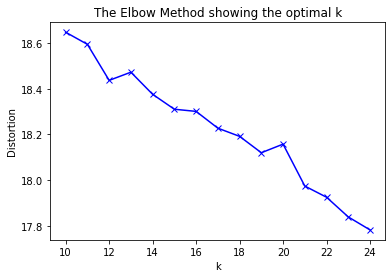

In [229]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(10,25)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(products4)
    kmeanModel.fit(products4)
    print("kmeans done for k=",k)
    distortions.append(sum(np.min(cdist(products4, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / products4.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [230]:
products6 = pd.merge(products3,esrbdescdf,left_index=True,right_index=True)

kmeans done for k= 10
kmeans done for k= 11
kmeans done for k= 12
kmeans done for k= 13
kmeans done for k= 14
kmeans done for k= 15
kmeans done for k= 16
kmeans done for k= 17
kmeans done for k= 18
kmeans done for k= 19
kmeans done for k= 20
kmeans done for k= 21
kmeans done for k= 22
kmeans done for k= 23
kmeans done for k= 24


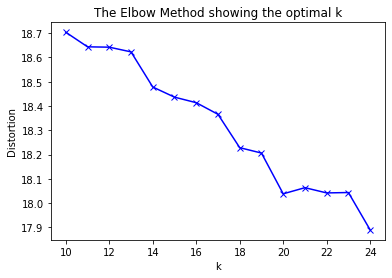

In [231]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(10,25)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(products6)
    kmeanModel.fit(products6)
    print("kmeans done for k=",k)
    distortions.append(sum(np.min(cdist(products6, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / products6.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

kmeans done for k= 10
kmeans done for k= 11
kmeans done for k= 12
kmeans done for k= 13
kmeans done for k= 14
kmeans done for k= 15
kmeans done for k= 16
kmeans done for k= 17
kmeans done for k= 18
kmeans done for k= 19
kmeans done for k= 20
kmeans done for k= 21
kmeans done for k= 22
kmeans done for k= 23
kmeans done for k= 24


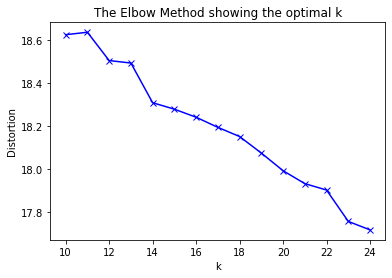

In [9]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(10,25)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(products3)
    kmeanModel.fit(products3)
    print("kmeans done for k=",k)
    distortions.append(sum(np.min(cdist(products3, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / products3.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()